In [108]:
import sys
import os
sys.path.append('../src')
from fsm import gspan_to_igraph
from graph_utils import get_user_graph, load_edges
import numpy as np
import pandas as pd
import igraph as ig
import networkx as nx

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
data_path = '../data/hashtags/edges/'
edge_files = [file for file in os.listdir(data_path) if file.endswith('.txt')]
df = pd.DataFrame([file.split('_')[0] for file in edge_files], columns=['edge_files'])

Get subgraph features for each graph

In [110]:
with open('../data/fsm/subgraphs/graph.gspan.fp', 'r') as f:
    gspan = f.read()
motifs = gspan_to_igraph(gspan)

motif_matrix = np.zeros((len(motifs), len(edge_files)))
lines = gspan.split('\n')
i = 0
for line in lines:
    if line.startswith('x'):
        for x in line.split(' ')[1:]:
            if x:
                motif_matrix[i, int(x)] = 1
        i += 1
df['motif_vector'] = list(motif_matrix.T)

Load base graphs to get sizes

In [123]:
base_graphs = []
for i, edge_file in enumerate(edge_files):
    # read edge file
    edge_file_path = os.path.join(data_path, edge_file)
    edges = load_edges(edge_file_path)
    g = get_user_graph(edges)
    base_graphs.append(g)
df['graph_size'] = [g.vcount() for g in base_graphs]

In [124]:
category_map = {
    'anime' : 'Shared interest/subculture',
    'booktok' : 'Shared interest/subculture',
    'football' : 'Shared interest/subculture',
    'gym' : 'Shared interest/subculture',
    'jazz' : 'Shared interest/subculture',
    'kpop' : 'Shared interest/subculture',
    'lgbt' : 'Shared interest/subculture',
    'makeup' : 'Shared interest/subculture',
    'minecraft' : 'Shared interest/subculture',
    'plantsoftiktok' : 'Shared interest/subculture',

    'biden2024' : 'Political discussion',
    'blacklivesmatter' : 'Political discussion',
    'climatechange' : 'Political discussion',
    'conspiracy' : 'Political discussion',
    'election' : 'Political discussion',
    'gaza' : 'Political discussion',
    'israel' : 'Political discussion',
    'maga' : 'Political discussion',
    'palestine' : 'Political discussion',
    'trump2024'    : 'Political discussion',

    'asmr' : 'Entertainment/knowledge',
    'challenge' : 'Entertainment/knowledge',
    'comedy' : 'Entertainment/knowledge',
    'learnontiktok' : 'Entertainment/knowledge',
    'movie' : 'Entertainment/knowledge',
    'news' : 'Entertainment/knowledge',
    'science' : 'Entertainment/knowledge',
    'storytime' : 'Entertainment/knowledge',
    'tiktoknews' : 'Entertainment/knowledge',
    'watermelon' : 'Entertainment/knowledge',
}

df['category'] = [category_map[file.split('_')[0]] for file in edge_files]

Plot cool graphs

In [125]:
pca = PCA(n_components=2)
# pca = TSNE(n_components=2, perplexity=15, random_state=69)
x = pca.fit_transform(motif_matrix.T)
df['pca1'] = x[:, 0]
df['pca2'] = x[:, 1]

Text(0.5, 1.0, 'PCA of motif vectors')

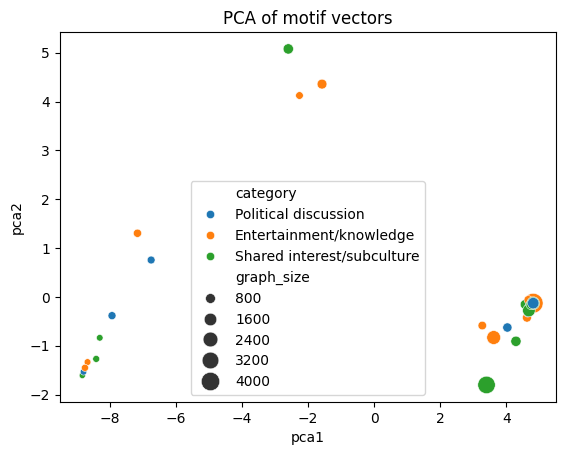

In [126]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='pca1', y='pca2', hue='category', size='graph_size', sizes=(20, 200))
ax.set_title('PCA of motif vectors')

In [115]:
pca.explained_variance_ratio_.sum()

np.float64(0.8435916050322617)

In [121]:
df[['graph_size', 'pca1', 'pca2']].corr()

,graph_size,pca1,pca2
graph_size,1.000000,4.622125e-01,-6.092424e-02
pca1,0.462213,1.000000e+00,-8.246123e-18
pca2,-0.060924,-8.246123e-18,1.000000e+00
